(supply_demand_multiple_goods)=
# 多种商品的供需关系

## 概览

在{doc}`之前的讲座 <intro_supply_demand>`中我们研究了一个只有单一消费商品市场的供给、需求和福利。

在这个讲座中，我们将研究有$n$种商品及其$n$对应价格的情景。

在这次讲座中，我们将遇到的关键基础概念包括：

* 逆需求曲线
* 财富的边际效用
* 逆供给曲线
* 消费者剩余
* 生产者剩余
* 作为消费者剩余和生产者剩余之和的社会福利
* 竞争均衡

我们将提供[福利经济学第一定理](https://baike.baidu.com/item/福利经济学第一定理/2508592)的一个版本，这个定理是由下列经济学家提出的：

* [莱昂·瓦尔拉斯](https://baike.baidu.com/item/莱昂·瓦尔拉斯)
* [弗朗西斯·伊西德罗·埃奇沃思](https://baike.baidu.com/item/弗朗西斯·伊西德罗·埃奇沃思)
* [维尔弗雷多·帕累托](https://baike.baidu.com/item/维尔弗雷多·帕累托)

以下学者为拓展这些关键思想做出了重大贡献：

* [阿巴·勒纳](https://baike.baidu.com/item/阿巴·勒纳)
* [哈罗德·霍特林](https://baike.baidu.com/item/哈罗德·霍特林)
* [保罗·萨缪尔森](https://baike.baidu.com/item/保罗·萨缪尔森)
* [肯尼斯·阿罗](https://baike.baidu.com/item/肯尼斯·阿罗) 
* [热拉尔·德布鲁](https://baike.baidu.com/item/热拉尔·德布鲁)

我们将描述两个经典的福利定理：

* **第一福利定理：** 对于给定的消费者之间的财富分布，竞争均衡下的商品分配方案可以解决社会规划问题。
* **第二福利定理：** 如果一个社会规划问题可以找到最优解，那么通过对财富的适当初始分配，就可以通过竞争均衡来实现这个最优解。

如往常一样，我们首先导入一些Python模块。

In [1]:
# 导入一些包
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.linalg import inv

FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

## 来自线性代数的公式

我们将应用线性代数中的公式，这些公式为：

* 对内积中的一个向量求导
* 在矩阵与向量的乘积中对向量本身求导
* 在向量的二次型对中对向量本身求导

这里 $a$ 为一个 $n \times 1$ 向量，$A$ 为一个 $n \times n$ 矩阵, 且 $x$ 为一个 $n \times 1$ 向量:

$$
\frac{\partial a^\top x }{\partial x} = \frac{\partial x^\top a }{\partial x} = a
$$

$$
\frac{\partial A x} {\partial x} = A
$$

$$
\frac{\partial x^\top A x}{\partial x} = (A + A^\top)x
$$

## 从效用函数到需求曲线

我们对消费者的研究将使用以下基本元素：

* $\Pi$ 是一个 $m \times n$ 矩阵，
* $b$ 是一个 $m \times 1$ 的最优满足点向量，
* $e$ 是一个 $n \times 1$ 的禀赋向量，

我们将分析内生对象 $c$ 和 $p$，其中：

* $c$ 是一个 $n \times 1$ 各种商品的消费向量，
* $p$ 是一个 $n \times 1$ 价格向量

矩阵 $\Pi$ 描述了消费者将一种商品替换为其他任意一种商品的意愿。

我们假设 $\Pi$ 的列线性独立，这意味着 $\Pi^\top \Pi$ 是一个正定矩阵。

* 这意味着 $\Pi^\top \Pi$ 有一个逆矩阵。

我们将在下面看到，$(\Pi^\top \Pi)^{-1}$ 是一个 $c$对价格向量求导的、（补偿）需求曲线斜率矩阵：

$$
    \frac{\partial c } {\partial p} = (\Pi^\top \Pi)^{-1}
$$

作为价格接受者，消费者面对着价格 $p$ ，并选择 $c$ 来最大化效用函数

$$
    -\frac{1}{2} (\Pi c -b)^\top (\Pi c -b)
$$ (eq:old0)

受到预算约束的限制

$$
    p^\top (c -e) = 0
$$ (eq:old2)

我们将指定一些例子，其中 $\Pi$ 和 $b$ 的关系通常是这样的：

$$
    \Pi c \ll b
$$ (eq:bversusc)

这意味着消费者得到的每种商品的数量都远少于他想要的数量。

在 {eq}`eq:bversusc` 中的偏差最终将保证竞争性均衡价格是正的。

### 隐含约束效用最大化的需求曲线

目前，我们假设预算约束是 {eq}`eq:old2`。

因此，我们将推导出所谓的**马歇尔**需求曲线。

我们的目标是在约束 [](eq:old2) 下最大化 [](eq:old0)。

构建拉格朗日方程

$$ L = - \frac{1}{2} (\Pi c -b)^T (\Pi c -b ) + \mu [p^T (e-c)] $$

其中 $\mu$ 是一个拉格朗日乘数，通常被称为**财富的边际效用**。

消费者选择 $c$ 来最大化 $L$，选择 $\mu$ 来最小化 $L$。

$c$ 的一阶条件是

$$
    \frac{\partial L} {\partial c}
    = - \Pi^T \Pi c + \Pi^T b - \mu p = 0
$$

因此，给定 $\mu$，消费者选择

$$
    c = (\Pi^T \Pi )^{-1}(\Pi^T b -  \mu p )
$$ (eq:old3)

将 {eq}`eq:old3` 代入预算约束 {eq}`eq:old2` 并解出 $\mu$ ，可以得到

$$
    \mu(p,e) = \frac{p^T ( \Pi^T \Pi )^{-1} \Pi^T b - p^T e}{p^T (\Pi^T \Pi )^{-1} p}.
$$ (eq:old4)

等式 {eq}`eq:old4` 描述了财富的边际效用如何依赖于禀赋向量 $e$ 和价格向量 $p$。

```{note}
等式 {eq}`eq:old4` 是基于约束 $p^T (c - e) = 0$ 得到的结果。

我们也可以将 $\mu$ 视为一个参数，并使用 {eq}`eq:old3` 和预算约束 {eq}`eq:old2p` 来计算财富。

我们如何进行取决于我们是构建**马歇尔**需求曲线还是**希克斯**需求曲线。
```

## 禀赋经济

我们现在研究一个纯交换经济体————有时被称为禀赋经济。

考虑一个拥有单一消费者和多种商品但没有生产的经济体。

商品的唯一来源是单一消费者的禀赋向量 $e$。

一个竞争均衡价格向量促使这个消费者选择 $c=e$。

这意味着均衡价格向量满足

$$
p = \mu^{-1} (\Pi^	T b - \Pi^	T \Pi e)
$$

在当前这个案例中，我们施加了形式为 {eq}`eq:old2` 的预算约束，由此我们可以通过让财富的边际效用 $\mu =1$（或其他任何值）来规范化价格向量。

这相当于选择一个通用单位（或计价单位），在该单位中表达所有商品的价格。

（价格翻倍既不会影响产量也不会影响相对价格。）

我们使 $\mu=1$。

```{exercise}
:label: sdm_ex1

证明在 {eq}`eq:old3` 中，使 $\mu=1$ 意味着满足公式 {eq}`eq:old4`。

```

```{exercise}
:label: sdm_ex2

证明在 {eq}`eq:old3` 中，使 $\mu=2` 依旧意味着满足公式 {eq}`eq:old4`。

```

以下是计算这个经济体竞争均衡的一个类。

In [2]:
class ExchangeEconomy:
    
    def __init__(self,
                 Π,
                 b, 
                 e,
                 thres=1.5):
        """
        设置交换经济体的环境

        参数:
            Π (np.array): 替代共享矩阵
            b (list): 消费者的最优满足点
            e (list): 消费者的禀赋
            thres (float): 检查 p >> Π e 条件的临界值
        """

        # 检查非饱和性
        if np.min(b / np.max(Π @ e)) <= thres:
            raise Exception('将最优满足点设置得更远一些')


        self.Π, self.b, self.e = Π, b, e

    
    def competitive_equilibrium(self):
        """
        计算竞争均衡价格和各商品的分配
        """
        Π, b, e = self.Π, self.b, self.e

        # 计算价格向量，μ=1
        p = Π.T @ b - Π.T @ Π @ e
        
        # 计算消费向量
        slope_dc = inv(Π.T @ Π)
        Π_inv = inv(Π)
        c = Π_inv @ b - slope_dc @ p

        if any(c < 0):
            print(f'分配: {c}')
            raise Exception('负分配：均衡不存在')

        return p, c

## 题外话：马歇尔需求曲线与希克斯需求曲线

有时，我们会在消费者的禀赋向量 $e$ 是其**唯一**收入来源的情况下，使用预算约束 {eq}`eq:old2`。

其他时候，我们假设消费者有另外一个收入来源（正或负），并把他的预算约束写为

$$
p ^\top (c -e) = w
$$ (eq:old2p)

其中 $w$ 以“美元”（或其他**计价单位**）衡量，而价格向量的组成部分 $p_i$ 则以一单位商品 $i$ 多少美元来衡量。

消费者的财富边际效用取决于消费者的预算约束是 {eq}`eq:old2` 还是 {eq}`eq:old2p`， 也取决于将 $w$ 视为一个自由参数还是一个内生变量。

因此，如何设置 $\mu$ 决定了我们是在构建

* **马歇尔** 需求曲线，此时，我们使用 {eq}`eq:old2` 并使用上述等式 {eq}`eq:old4` 来解 $\mu$ ，或者
* **希克斯** 需求曲线，此时，我们将 $\mu$ 视为一个固定参数并用 {eq}`eq:old2p` 来解 $w$ 。

马歇尔和希克斯需求曲线考虑的是不同的心理实验：

对于马歇尔需求曲线，假设的价格向量变化引起了**替代**效应和**收入**效应

* 收入效应是价格向量变化所引起的 $p^\top e$ 变动的结果

对于希克斯需求曲线，假设的价格向量变化只引起了**替代**效应

* 因为我们固定 $\mu$ 来解出 $w$，价格向量的变化不会改变 $p^\top e + w$

有时希克斯需求曲线被称为**补偿**需求曲线，以强调为了消除与价格变化相关的收入（或财富）效应，消费者的财富 $w$ 被调整。

后面我们将更多地讨论这些不同的需求曲线。

## 作为特殊情况的动态与风险

我们可以创建$n$物品纯交换模型的特殊案例来体现：

* **动态** —— 通过在不同的商品上标识不同的日期
* **风险** —— 通过设定商品的交付依赖于世界的状态，这些状态的实现由一个已知的概率分布描述

让我们来具体说明一下。

### 动态

假设我们想要表示一个效用函数

$$
  - \frac{1}{2} [(c_1 - b_1)^2 + \beta (c_2 - b_2)^2]
$$

这里 $\beta \in (0,1)$ 是一个贴现因子，$c_1$ 是在时间1的消费，$c_2$ 是在时间2的消费。

想要用二次效用函数{eq}`eq:old0`来得到上面的式子，需要使

$$
\Pi = \begin{bmatrix} 1 & 0 \cr
         0 & \sqrt{\beta} \end{bmatrix}
$$

$$
e = \begin{bmatrix} e_1 \cr e_2 \end{bmatrix}
$$

以及

$$
b = \begin{bmatrix} b_1 \cr \sqrt{\beta} b_2 \end{bmatrix}
$$

预算约束{eq}`eq:old2`变为

$$
p_1 c_1 + p_2 c_2 = p_1 e_1 + p_2 e_2
$$

左侧是消费的**贴现现值**。

右侧是消费者禀赋的**贴现现值**。

相对价格 $\frac{p_1}{p_2}$ 的单位是每单位时间 $1$ 商品所对应的时间 $2$ 商品的数量。

因此，

$$
    (1+r) := R := \frac{p_1}{p_2}
$$ 

是**毛利率**，$r$ 是**净利率**。

以下是一个例子。

In [3]:
beta = 0.95

Π = np.array([[1, 0],
              [0, np.sqrt(beta)]])

b = np.array([5, np.sqrt(beta) * 5])

e = np.array([1, 1])

dynamics = ExchangeEconomy(Π, b, e)
p, c = dynamics.competitive_equilibrium()

print('竞争均衡价格向量:', p)
print('竞争均衡分配:', c)

竞争均衡价格向量: [4.  3.8]
竞争均衡分配: [1. 1.]


### 风险与状态相关权益

我们在**静态**环境中研究风险，这意味着我们只研究一个时间段。

所谓**风险**，是指结果事先未知，但受已知概率分布的制约。

例如，我们的消费者面对的**风险**特别体现在：

  * 有两种自然状态，$1$ 和 $2$。

  * 消费者知道状态 $1$ 发生的概率是 $\lambda$。

  * 消费者知道状态 $2$ 发生的概率是 $(1-\lambda)$。

在结果实现之前，消费者的**预期效用**是

$$
-\frac{1}{2} [\lambda (c_1 - b_1)^2 + (1-\lambda)(c_2 - b_2)^2]
$$

其中：

* $c_1$ 是处于状态 $1$ 中的消费
* $c_2$ 是处于状态 $2$ 中的消费

为了描述这些偏好，我们使

$$
\Pi = \begin{bmatrix} \sqrt{\lambda} & 0 \cr
                     0  & \sqrt{1-\lambda} \end{bmatrix}
$$

$$
e = \begin{bmatrix} e_1 \cr e_2 \end{bmatrix}
$$

$$
b = \begin{bmatrix} \sqrt{\lambda}b_1 \cr \sqrt{1-\lambda}b_2 \end{bmatrix}
$$

消费者的禀赋向量是

$$
c = \begin{bmatrix} c_1 \cr c_2 \end{bmatrix}
$$

价格向量是

$$
p = \begin{bmatrix} p_1 \cr p_2 \end{bmatrix}
$$

其中 $p_i$ 是状态 $i \in \{1, 2\}$ 下的一单位消费的价格。

交易中的状态依赖型商品（即商品的价值取决于状态值）通常被称为**阿罗证券 (Arrow securities)**。

在世界的随机状态 $i$ 实现之前，消费者卖掉他/她的状态依赖型禀赋组合，并购买一个状态依赖型消费组合。

交易此类状态依赖型商品是经济学家常用来模拟**保险**的方式之一。

我们使用上述技巧将 $c_1, c_2$ 解释为“阿罗证券”，这是一种即根据不同状态而具有不同价值的消费品索取权。

以下是一个风险经济的实例：

In [4]:
prob = 0.2

Π = np.array([[np.sqrt(prob), 0],
              [0, np.sqrt(1 - prob)]])

b = np.array([np.sqrt(prob) * 5, np.sqrt(1 - prob) * 5])

e = np.array([1, 1])

risk = ExchangeEconomy(Π, b, e)
p, c = risk.competitive_equilibrium()

print('竞争均衡价格向量:', p)
print('竞争均衡分配:', c)

竞争均衡价格向量: [0.8 3.2]
竞争均衡分配: [1. 1.]


```{exercise}
:label: sdm_ex3

考虑上面的实例。

以下每种情况会怎样影响均衡价格和均衡分配，请进行数值分析：

* 消费者变得更穷，
* 他们更喜欢第一种商品，
* 状态 $1$ 发生的概率更高。

提示：对于每种情况，选择与以上的例子不同的一些参数 $e, b, \text{或} \lambda$。

```

```{solution-start} sdm_ex3
:class: dropdown
```

首先考虑当消费者变得更穷的情况。

这里我们就减少禀赋。

In [5]:
risk.e = np.array([0.5, 0.5])

p, c = risk.competitive_equilibrium()

print('竞争均衡价格向量:', p)
print('竞争均衡分配:', c)

竞争均衡价格向量: [0.9 3.6]
竞争均衡分配: [0.5 0.5]


如果消费者更喜欢第一（或第二）种商品，那么我们可以为商品1设一个更大的最优满足值。

In [6]:
risk.b = np.array([np.sqrt(prob) * 6, np.sqrt(1 - prob) * 5])
p, c = risk.competitive_equilibrium()

print('竞争均衡价格向量:', p)
print('竞争均衡分配:', c)

竞争均衡价格向量: [1.1 3.6]
竞争均衡分配: [0.5 0.5]


增加状态 $1$ 发生的概率。

In [7]:
prob = 0.8

Π = np.array([[np.sqrt(prob), 0],
              [0, np.sqrt(1 - prob)]])

b = np.array([np.sqrt(prob) * 5, np.sqrt(1 - prob) * 5])

e = np.array([1, 1])

risk = ExchangeEconomy(Π, b, e)
p, c = risk.competitive_equilibrium()

print('竞争均衡价格向量:', p)
print('竞争均衡分配:', c)

竞争均衡价格向量: [3.2 0.8]
竞争均衡分配: [1. 1.]


```{solution-end}
```

## 具有内生供应的经济体

迄今为止，我们描述的是一个纯交换经济体，其中商品的禀赋是外生的，意味着它们是模型之外的因素。

### 竞争性公司的供给曲线

竞争性公司生产商品，商品的价格向量 $p$ 是既定的，并选择数量 $q$，来最大化总收入减去总成本的值。

因为商品价格向量对于竞争性公司来说是既定的，所以我们称它为**价格接受者**，在下文中我们用价格接受型竞争性公司来表示。

公司的总收入等于 $p^T q$，其总成本等于 $C(q)$，其中 $C(q)$ 是总成本函数

$$
C(q) = h^T q + \frac{1}{2} q^T J q
$$

其中 $J$ 是一个正定矩阵。

因此公司的利润是

$$
p^T q - C(q)
$$ (eq:compprofits)

一个 $n \times 1$ 的**边际成本**向量是

$$
\frac{\partial C(q)}{\partial q} = h + H q
$$

其中

$$
H = \frac{1}{2} (J + J^T)
$$

公司通过将**边际收入等于边际成本**来最大化总利润。

对于价格接受型公司，一个 $n \times 1$ 的边际收入向量是 $\frac{\partial p^T q}
{\partial q} = p $。

因此，对于这个价格接受型竞争性公司，**价格等于边际收入**。

这产生了以下的竞争性公司的**逆供给曲线**：

$$
p = h + H q
$$

### 竞争均衡

对于一个需求曲线由财富边际效用 $\mu$ 确定的生产型经济体，为了计算它的竞争性均衡，我们首先通过解决规划问题来计算分配问题。

然后，我们使用逆需求曲线或逆供给曲线来计算均衡价格向量。

#### 热身：$\mu=1$ 

作为一个特殊情况，我们通过让财富的边际效用 $\mu =1$ 来确定一个需求曲线。

让供给价格等于需求价格，并使 $q=c$，我们可以得到

$$
p = h + H c = \Pi^{\top} b - \Pi^{\top} \Pi c,
$$

这意味着均衡产量向量是

$$
c = (\Pi^{\top} \Pi + H )^{-1} ( \Pi^{\top} b - h)
$$ (eq:old5)

这个等式和我们开始时标量 $n=1$ 的模型中的均衡产量 {eq}`eq:old1` 相对应。

#### 一般情况： $\mu \neq 1$ 

现在，让我们使 $\mu \neq 1$，来扩展前面的分析。

由此，逆需求曲线为

$$
p = \mu^{-1} [\Pi^{\top} b - \Pi^{\top} \Pi c]
$$ (eq:old5pa)

使这个等式等于逆供给曲线，让 $q=c$ 并解出 $c$ 得

$$
c = [\Pi^{\top} \Pi + \mu H]^{-1} [ \Pi^{\top} b - \mu h]
$$ (eq:old5p)

### 实践

生产型经济体包括：

* 一个可以被理解为代表性消费者的**个人**
* 一组**生产成本**
* 一个在规划者福利函数中衡量“消费者”与“生产者”权重的权重因子 $\mu$，如上文所述
* 一个 $n \times 1$ 向量 $p$，代表竞争均衡价格
* 一个 $n \times 1$ 向量 $c$，代表竞争均衡数量
* **消费者剩余**
* **生产者剩余**

这里我们定义一个类 `ProductionEconomy`。

In [8]:
class ProductionEconomy:
    
    def __init__(self, 
                 Π, 
                 b, 
                 h, 
                 J, 
                 μ):
        """
        设置生产型经济体的环境

        参数:
            Π (np.ndarray): 替代矩阵
            b (np.array): 最优满足点
            h (np.array): 成本函数中的 h
            J (np.ndarray): 成本函数中的 J
            μ (float): 对应规划问题中的福利权重
        """
        self.n = len(b)
        self.Π, self.b, self.h, self.J, self.μ = Π, b, h, J, μ
        
    def competitive_equilibrium(self):
        """
        计算生产型经济体的竞争均衡
        """
        Π, b, h, μ, J = self.Π, self.b, self.h, self.μ, self.J
        H = .5 * (J + J.T)

        # 配置分配
        c = inv(Π.T @ Π + μ * H) @ (Π.T @ b - μ * h)

        # 计算价格
        p = 1 / μ * (Π.T @ b - Π.T @ Π @ c)

        # 检查非饱和
        if any(Π @ c - b >= 0):
            raise Exception('无效结果：将最优满足点设置得更远一些')

        return c, p

    def compute_surplus(self):
        """
        计算单一商品情况下的消费者剩余和生产者剩余
        """
        if self.n != 1:
            raise Exception('不是单一商品')
        h, J, Π, b, μ = self.h.item(), self.J.item(), self.Π.item(), self.b.item(), self.μ
        H = J

        # 供给曲线/需求曲线的系数
        s0, s1 = h, H
        d0, d1 = 1 / μ * Π * b, 1 / μ * Π**2

        # 竞争均衡
        c, p = self.competitive_equilibrium()

        # 计算剩余
        c_surplus = d0 * c - .5 * d1 * c**2 - p * c
        p_surplus = p * c - s0 * c - .5 * s1 * c**2

        return c_surplus, p_surplus

然后定义一个函数，用于绘制需求曲线和供给曲线，并标注剩余和均衡点。

In [9]:
def plot_competitive_equilibrium(PE):
    """
    绘制需求曲线和供给曲线，生产者/消费者剩余以及单一商品生产型经济体的均衡点

    参数:
        PE (class): 初始化的生产型经济体的类
    """
    # 获取单一值
    J, h, Π, b, μ = PE.J.item(), PE.h.item(), PE.Π.item(), PE.b.item(), PE.μ
    H = J

    # 计算竞争均衡
    c, p = PE.competitive_equilibrium()
    c, p = c.item(), p.item()

    # 逆供给/逆需求曲线
    supply_inv = lambda x: h + H * x
    demand_inv = lambda x: 1 / μ * (Π * b - Π * Π * x)

    xs = np.linspace(0, 2 * c, 100)
    ps = np.ones(100) * p
    supply_curve = supply_inv(xs)
    demand_curve = demand_inv(xs)

    # 绘图
    plt.figure()
    plt.plot(xs, supply_curve, label='供给曲线', color='#020060')
    plt.plot(xs, demand_curve, label='需求曲线', color='#600001')

    plt.fill_between(xs[xs <= c], demand_curve[xs <= c], ps[xs <= c], label='消费者剩余', color='#EED1CF')
    plt.fill_between(xs[xs <= c], supply_curve[xs <= c], ps[xs <= c], label='生产者剩余', color='#E6E6F5')

    plt.vlines(c, 0, p, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(p, 0, c, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(c, p, zorder=10, label='竞争均衡', color='#600001')

    plt.legend(loc='upper right')
    plt.margins(x=0, y=0)
    plt.ylim(0)
    plt.xlabel('产量')
    plt.ylabel('价格')
    plt.show()

#### 示例：单一经济体与单一商品和生产

现在，我们来构建一个包含单一商品的生产经济体。

为此我们需要：

  * 指定一个**个人**和一个**成本曲线**，以复现我们开始时用到的简单单一商品供求的示例

  * 计算均衡 $p$ 和 $c$，以及消费者剩余和生产者剩余

  * 绘制这两种剩余的图

  * 改变 $b$ 从而探究 $p, c$ 如何变化

竞争均衡价格: 5.25
竞争均衡分配: 4.75


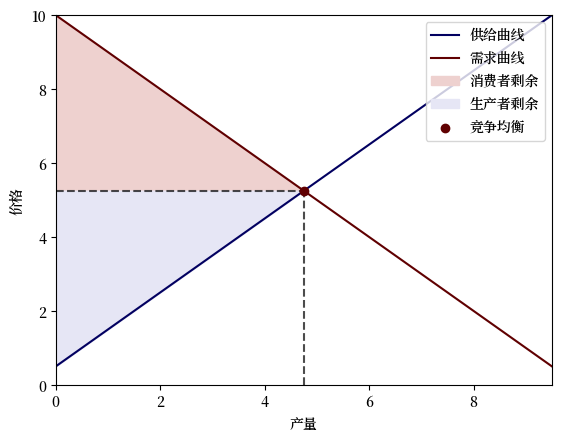

In [10]:
Π = np.array([[1]])  # 矩阵现在是一个单一值
b = np.array([10])
h = np.array([0.5])
J = np.array([[1]])
μ = 1

PE = ProductionEconomy(Π, b, h, J, μ)
c, p = PE.competitive_equilibrium()

print('竞争均衡价格:', p.item())
print('竞争均衡分配:', c.item())

plot_competitive_equilibrium(PE)

In [11]:
c_surplus, p_surplus = PE.compute_surplus()

print('消费者剩余:', c_surplus.item())
print('生产者剩余:', p_surplus.item())

消费者剩余: 11.28125
生产者剩余: 11.28125


通过提高 $\mu$ 来降低消费者的福利权重。

竞争均衡价格: 3.5
竞争均衡分配: 3.0


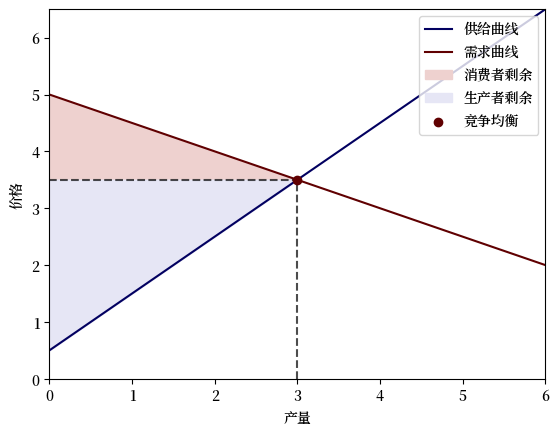

In [12]:
PE.μ = 2
c, p = PE.competitive_equilibrium()

print('竞争均衡价格:', p.item())
print('竞争均衡分配:', c.item())

plot_competitive_equilibrium(PE)

In [13]:
c_surplus, p_surplus = PE.compute_surplus()

print('消费者剩余:', c_surplus.item())
print('生产者剩余:', p_surplus.item())

消费者剩余: 2.25
生产者剩余: 4.5


现在我们改变最优满足点，使消费者从消费中获得更多的效用。

竞争均衡价格: 7.75
竞争均衡分配: 7.25


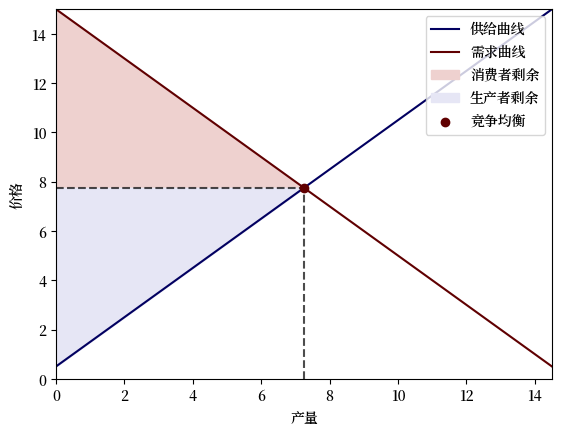

In [14]:
PE.μ = 1
PE.b = PE.b * 1.5
c, p = PE.competitive_equilibrium()

print('竞争均衡价格:', p.item())
print('竞争均衡分配:', c.item())

plot_competitive_equilibrium(PE)

这将提高均衡价格和均衡产量。

#### 示例：单个主体、两个商品且包含生产的经济体系

  * 我们将进行一些类似上面的实验

  * 我们可以使用**对角矩阵** $\Pi$ ，也可以使用**非对角矩阵** $\Pi$ 矩阵来做实验，来研究交叉斜率如何影响 $p$ 和 $c$ 对 $b$ 的各种变化的反应。

In [15]:
Π = np.array([[1, 0],
              [0, 1]])

b = np.array([10, 10])

h = np.array([0.5, 0.5])

J = np.array([[1, 0.5],
              [0.5, 1]])
μ = 1

PE = ProductionEconomy(Π, b, h, J, μ)
c, p = PE.competitive_equilibrium()

print('竞争均衡价格:', p)
print('竞争均衡分配:', c)

竞争均衡价格: [6.2 6.2]
竞争均衡分配: [3.8 3.8]


In [16]:
PE.b = np.array([12, 10])

c, p = PE.competitive_equilibrium()

print('竞争均衡价格:', p)
print('竞争均衡分配:', c)

竞争均衡价格: [7.13333333 6.46666667]
竞争均衡分配: [4.86666667 3.53333333]


In [17]:
PE.Π = np.array([[1, 0.5],
                 [0.5, 1]])

PE.b = np.array([10, 10])

c, p = PE.competitive_equilibrium()

print('竞争均衡价格:', p)
print('竞争均衡分配:', c)

竞争均衡价格: [6.3 6.3]
竞争均衡分配: [3.86666667 3.86666667]


In [18]:
PE.b = np.array([12, 10])
c, p = PE.competitive_equilibrium()

print('竞争均衡价格:', p)
print('竞争均衡分配:', c)

竞争均衡价格: [7.23333333 6.56666667]
竞争均衡分配: [4.93333333 3.6       ]


### 题外话：垄断供应商

竞争性公司是一个**价格接受者**，因此其边际收入是无法由自己控制的。

垄断者知道他们没有竞争对手，可以通过设定产量来影响价格及其边际收入。

垄断者认为自己无法控制**需求曲线**，而不是**价格**。

因此，垄断者不是价格接受者，而是在逆需求曲线{eq}`eq:old5pa`的约束下，设定价格来最大化利润。

所以垄断者的总利润（关于其产量$q$的函数）是

$$
[\mu^{-1} \Pi^{\text{top}} (b - \Pi q)]^{\text{top}} q - h^{\text{top}} q - \frac{1}{2} q^{\text{top}} J q
$$ (eq:monopprof)

在找到关于$q$的、使垄断者利润最大化的一阶必要条件并求解$q$之后，我们发现垄断者设定的产量为

$$
q = (H + 2 \mu^{-1} \Pi^{\text{top}} \Pi)^{-1} (\mu^{-1} \Pi^{\text{top}} b - h)
$$ (eq:qmonop)

我们很快会看到，一个垄断者设置的**产量$q$**比以下任何情况都要**低**：

 * 社会规划者选择$q$来最大化社会福利

 * 竞争均衡



```{exercise}
:label: sdm_ex4

请证明垄断者的供给曲线是 {eq}`eq:qmonop`。

```

### 垄断者

我们来考虑一个垄断供应商。

我们在 `ProductionEconomy` 的类中加入了一个方法，来计算供应商作为垄断者时的均衡价格和均衡分配。

由于供应商现在拥有设定价格的权力：

- 我们首先计算解决垄断者利润最大化问题的最优产量。
- 然后我们从消费者的逆需求曲线中推导出一个均衡价格。

接下来，我们用一个图来展示单一商品情况下，竞争均衡和垄断供应商均衡之间的区别。

回忆一下，在竞争均衡中，一个价格接受型供应商会使边际收入 $p$ 等于边际成本 $h + Hq$。

这就得出了竞争性生产者的逆供给曲线。

垄断者的边际收入不是常数，而是一个依赖于垄断者设定的产量的非平凡函数。

垄断者的边际收入为

$$
MR(q) = -2\mu^{-1}\Pi^{\text{top}}\Pi q+\mu^{-1}\Pi^{\text{top}}b,
$$

垄断者使这个边际收入等于其边际成本。

该图显示，垄断者设定的产量低于竞争均衡量。

在单一商品情况下，这种均衡与商品的更高价格相关。

In [19]:
class Monopoly(ProductionEconomy):
    
    def __init__(self, 
                 Π, 
                 b, 
                 h, 
                 J, 
                 μ):
        """
        继承ProductionEconomy类的所有属性和方法
        """
        super().__init__(Π, b, h, J, μ)
        

    def equilibrium_with_monopoly(self):
        """
        在有垄断供应商的情况下计算均衡价格和均衡分配
        """
        Π, b, h, μ, J = self.Π, self.b, self.h, self.μ, self.J
        H = .5 * (J + J.T)

        # 分配
        q = inv(μ * H + 2 * Π.T @ Π) @ (Π.T @ b - μ * h)

        # 价格
        p = 1 / μ * (Π.T @ b - Π.T @ Π @ q)

        if any(Π @ q - b >= 0):
            raise Exception('无效结果：将最优满足点设置得更远一些')

        return q, p

定义一个函数，绘制需求曲线、边际成本曲线以及边际收入曲线，并标注出剩余和均衡点。

In [20]:
def plot_monopoly(M):
    """
    在具有垄断供应商的单一商品经济的情况下，绘制需求曲线、边际生产成本、边际收入、剩余以及均衡的情况

    参数：
        M (class): 继承单一商品垄断经济类ProductionEconomy的类
    """
    # 获取单一值
    J, h, Π, b, μ = M.J.item(), M.h.item(), M.Π.item(), M.b.item(), M.μ
    H = J

    # 计算竞争均衡
    c, p = M.competitive_equilibrium()
    q, pm = M.equilibrium_with_monopoly()
    c, p, q, pm = c.item(), p.item(), q.item(), pm.item()

    # 计算

    # 逆供给/需求曲线
    marg_cost = lambda x: h + H * x  # 边际成本
    marg_rev = lambda x: -2 * 1 / μ * Π * Π * x + 1 / μ * Π * b  # 边际收入
    demand_inv = lambda x: 1 / μ * (Π * b - Π * Π * x)  # 需求曲线

    xs = np.linspace(0, 2 * c, 100)
    pms = np.ones(100) * pm
    marg_cost_curve = marg_cost(xs)
    marg_rev_curve = marg_rev(xs)
    demand_curve = demand_inv(xs)

    # 绘图
    plt.figure()
    plt.plot(xs, marg_cost_curve, label='边际成本', color='#020060')
    plt.plot(xs, marg_rev_curve, label='边际收入', color='#E55B13')
    plt.plot(xs, demand_curve, label='需求', color='#600001')

    plt.fill_between(xs[xs <= q], demand_curve[xs <= q], pms[xs <= q], label='消费者剩余', color='#EED1CF')
    plt.fill_between(xs[xs <= q], marg_cost_curve[xs <= q], pms[xs <= q], label='生产者剩余', color='#E6E6F5')

    plt.vlines(c, 0, p, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(p, 0, c, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(c, p, zorder=10, label='竞争均衡', color='#600001')

    plt.vlines(q, 0, pm, linestyle="dashed", color='black', alpha=0.7)
    plt.hlines(pm, 0, q, linestyle="dashed", color='black', alpha=0.7)
    plt.scatter(q, pm, zorder=10, label='垄断均衡', color='#E55B13')

    plt.legend(loc='upper right')
    plt.margins(x=0, y=0)
    plt.ylim(0)
    plt.xlabel('产量')
    plt.ylabel('价格')
    plt.show()

#### 多种商品的例子

让我们在一个拥有多种商品的经济体中比较竞争均衡和垄断结果。

In [21]:
Π = np.array([[1, 0],
              [0, 1.2]])

b = np.array([10, 10])

h = np.array([0.5, 0.5])

J = np.array([[1, 0.5],
              [0.5, 1]])
μ = 1

M = Monopoly(Π, b, h, J, μ)
c, p = M.competitive_equilibrium()
q, pm = M.equilibrium_with_monopoly()

print('竞争均衡价格:', p)
print('竞争均衡分配:', c)

print('垄断供应商的均衡价格:', pm)
print('垄断供应商的均衡分配:', q)

竞争均衡价格: [6.23542117 6.32397408]
竞争均衡分配: [3.76457883 3.94168467]
垄断供应商的均衡价格: [7.26865672 8.23880597]
垄断供应商的均衡分配: [2.73134328 2.6119403 ]


#### 单一商品的例子

竞争均衡价格: 5.25
竞争均衡分配: 4.75
垄断供应商的均衡价格: 6.833333333333334
垄断供应商的均衡分配: 3.1666666666666665


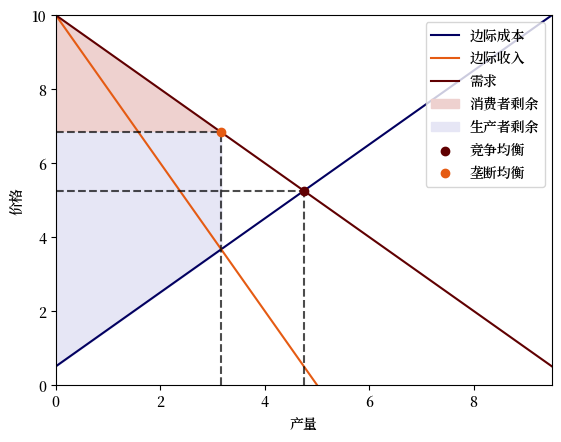

In [22]:
Π = np.array([[1]])  # 现在矩阵是一个单一值
b = np.array([10])
h = np.array([0.5])
J = np.array([[1]])
μ = 1

M = Monopoly(Π, b, h, J, μ)
c, p = M.competitive_equilibrium()
q, pm = M.equilibrium_with_monopoly()

print('竞争均衡价格:', p.item())
print('竞争均衡分配:', c.item())

print('垄断供应商的均衡价格:', pm.item())
print('垄断供应商的均衡分配:', q.item())

plot_monopoly(M)

## 多种商品的福利最大化问题

福利最大化问题 -- 有时也被称为社会规划问题 -- 是选择 $c$ 来最大化

$$
    - \frac{1}{2} \mu^{-1}(\Pi c -b)^\top (\Pi c -b)
$$

减去逆供给曲线下的面积，即，

$$
    h c + \frac{1}{2} c^\top J c  
$$

所以福利标准是

$$
    - \frac{1}{2} \mu^{-1}(\Pi c -b)^\top (\Pi c -b) -h c 
        - \frac{1}{2} c^\top J c
$$

在这个公式中，$\mu$ 是一个参数，描述了规划者如何权衡外部供应商和代表性消费者的利益。

对 $c$ 的一阶条件是

$$
- \mu^{-1} \Pi^\top \Pi c + \mu^{-1}\Pi^\top b - h -  J c = 0
$$

这意味着 {eq}`eq:old5p` 被满足。

因此，与单一商品的情况一样，对于多种商品情况，竞争均衡下的产量向量可以解决规划问题。

（这是第一福利定理的另一个版本。）

我们可以从以下两个地方推导出竞争均衡的价格向量：

  * 逆需求曲线，或

  * 逆供给曲线